In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#name = '1D1_60'
#rep = '1'
#R = 9.7 / 2 # in nm
#d = np.loadtxt('{0:s}_v{1:s}_nowat_msd.dat'.format(name, rep))

In [3]:
#### The function is from:
#### Shih, Amy Y., et al. "Molecular dynamics simulations of discoidal bilayers assembled from truncated human lipoproteins." Biophysical journal 88.1 (2005): 548-556
#### https://doi.org/10.1529/biophysj.104.046896
def func(x, D, R):
    return R**2 * (1 - np.exp(-3.39 * D * x / R**2) )

In [4]:
def plot_residual(d, func, popt, name, rep):
    fig, ax = plt.subplots()
    res = d[:,1] - func(d[:,0],*popt)
    ax.plot(d[:,0],res)
    ax.grid()
    ax.set_ylabel('Residual')
    ax.set_xlabel('Time (ps)')
    ax.set_title('{0:s} Replica {1:s}'.format(name, rep))
    plt.savefig('{0:s}_v{1:s}_Diffusion_fit_residual.png'.format(name, rep), dpi = 600)
    plt.show()
    return

In [5]:
def plot_data_func(d, func, popt, name, rep):
    plt.plot(d[:,0], func(d[:,0], *popt), color = 'black', linewidth=2, label='function')
    plt.plot(d[:,0], d[:,1], color ='red', label='data')
    plt.grid()
    plt.ylabel('MSD')
    plt.xlabel('Time (ps)')
    plt.title('{0:s} Replica {1:s}'.format(name, rep))
    plt.legend(loc='best')
    plt.savefig('{0:s}_v{1:s}_Diffusion_func_data.png'.format(name, rep), dpi=600)
    plt.show()
    return

In [6]:
#popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 4.85 ])

In [7]:
#Diffusion_coeff, Radius = popt.ravel()

In [8]:
#print ('Diffusion Coeffienct in nm²/ µs')
#print (Diffusion_coeff * 10**6)
#print ('\n')
#print ('Radius in nm of the bilayer patch')
#print (Radius)

1D1_70


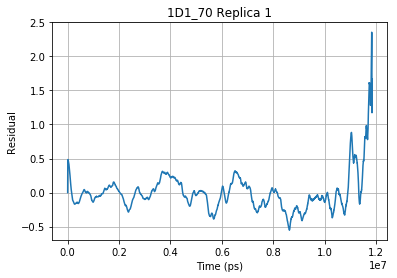

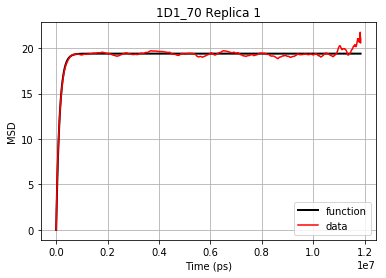

43.30019058707534


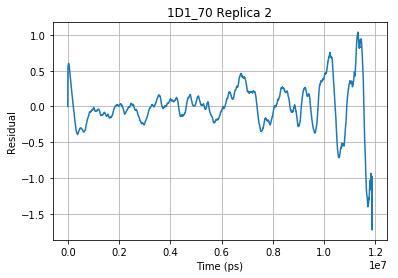

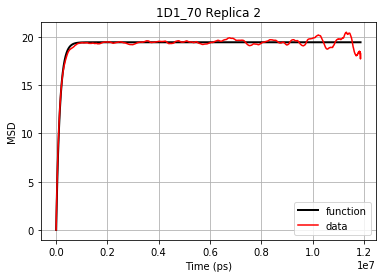

40.678355495390335


IOError: 1D1_70_v3_nowat_PO4_msd.xvg not found.

In [15]:
#systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90','NW11_99', 'NW11_110', 'NW9_54','NWLA_150']
systems = ['1D1_70', '1E3D1_134','NW9_54','NW11_70','NWLA_150']
Radius_list = [4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]
#file_out = open('Diffusion_coefficient_radius_ALL.dat', 'w')
#file_mean = open('Diffusion_coefficient_means.dat', 'w')
file_out = open('Diffusion_coefficient_radius_Non-cir_cir.dat', 'w')
file_mean = open('Diffusion_coefficient_means_Non-cir_cir.dat', 'w')
M = []
S = [] 
for idx, s in enumerate(systems): 
    name = s
    print (name)
    #print (idx)
    R = Radius_list[idx]
    #rep = '1'
    local_array = np.zeros([3])
    for r in range(1,4):
        rep='{0:d}'.format(r)
        d = np.loadtxt('{0:s}_v{1:s}_nowat_PO4_msd.xvg'.format(name, rep), comments=('#','@'))
        popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 4.85 ])
        Diffusion_coeff, Radius = popt.ravel()
        plot_residual(d, func, popt, name, rep)
        plot_data_func(d, func, popt, name, rep)
        file_out.write('{0:s} replica {1:s}\n'.format(name, rep))
        file_out.write('Diffusion Coeffcient in nm²/ µs\n')
        file_out.write('{0:.5f}\n'.format(Diffusion_coeff * 10**6))
        print Diffusion_coeff * 10**6
        file_out.write('Radius in nm of the bilayer patch\n')
        file_out.write('{0:.5f}\n'.format(Radius))
        file_out.write('\n')
        file_out.flush()
        
        local_array[r-1] = Diffusion_coeff * 10**6
    mean_coeff = np.average(local_array)
    std_coeff  = np.std(local_array)
    M.append(mean_coeff)
    S.append(std_coeff)
    #print (mean_coeff)
    file_mean.write('{0:s}\n'.format(name))
    file_mean.write('Mean Diffusion Coefficient in  nm²/ µs\n')
    file_mean.write('{0:f}\n'.format(mean_coeff))
    file_mean.write('Std\n')
    file_mean.write('{0:f}\n'.format(np.std(local_array)))
    file_mean.write('\n')
    file_mean.flush()

file_out.close()
file_mean.close()

1D1_70


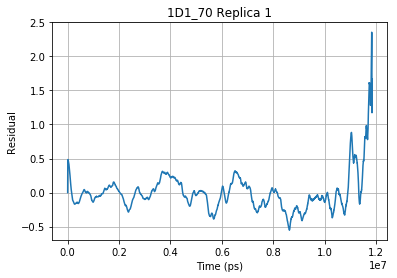

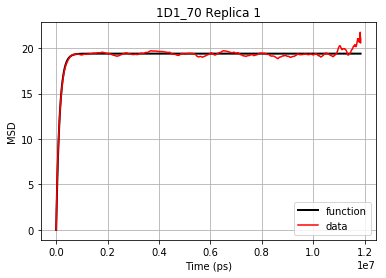

4.330019058707534e-11


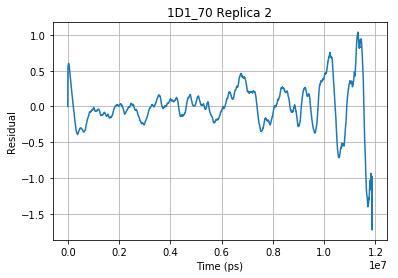

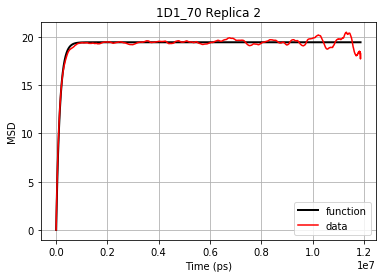

4.067835549539033e-11


IOError: 1D1_70_v3_nowat_PO4_msd.xvg not found.

In [13]:
######## Testing the units ################

#systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90','NW11_99', 'NW11_110', 'NW9_54','NWLA_150']
systems = ['1D1_70', '1E3D1_134','NW9_54','NW11_70','NWLA_150']
Radius_list = [4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]
#file_out = open('Diffusion_coefficient_radius_ALL.dat', 'w')
#file_mean = open('Diffusion_coefficient_means.dat', 'w')
file_out = open('Diffusion_coefficient_radius_Non-cir_cir-NEW.dat', 'w')
file_mean = open('Diffusion_coefficient_means_Non-cir_cir-NEW.dat', 'w')
M = []
S = [] 
for idx, s in enumerate(systems): 
    name = s
    print (name)
    #print (idx)
    R = Radius_list[idx]
    #rep = '1'
    local_array = np.zeros([3])
    for r in range(1,4):
        rep='{0:d}'.format(r)
        d = np.loadtxt('{0:s}_v{1:s}_nowat_PO4_msd.xvg'.format(name, rep), comments=('#','@'))
        popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 4.85 ])
        Diffusion_coeff, Radius = popt.ravel()
        plot_residual(d, func, popt, name, rep)
        plot_data_func(d, func, popt, name, rep)
        file_out.write('{0:s} replica {1:s}\n'.format(name, rep))
        file_out.write('Diffusion Coeffcient in nm²/ µs\n')
        file_out.write('{0:.5f}\n'.format(Diffusion_coeff * 10**-6))
        print Diffusion_coeff * 10**-6
        file_out.write('Radius in nm of the bilayer patch\n')
        file_out.write('{0:.5f}\n'.format(Radius))
        file_out.write('\n')
        file_out.flush()
        
        local_array[r-1] = Diffusion_coeff *  10**-6
    mean_coeff = np.average(local_array)
    std_coeff  = np.std(local_array)
    M.append(mean_coeff)
    S.append(std_coeff)
    #print (mean_coeff)
    file_mean.write('{0:s}\n'.format(name))
    file_mean.write('Mean Diffusion Coefficient in nm²/ µs\n')
    file_mean.write('{0:f}\n'.format(mean_coeff))
    file_mean.write('Std\n')
    file_mean.write('{0:f}\n'.format(np.std(local_array)))
    file_mean.write('\n')
    file_mean.flush()

file_out.close()
file_mean.close()

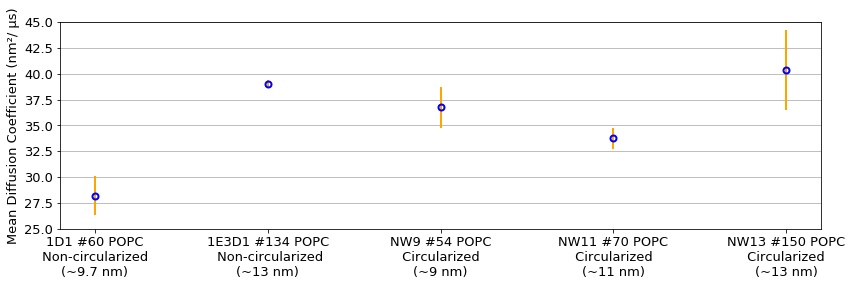

In [20]:
#labels = ['1D1\n #60 POPC/leaflet', '1ED3\n #134 POPC/leafet', 'NW9\n #54 POPC/leaflet', 'NW11\n #70 POPC/leaflet', 'NW13\n #150 POPC/leaflet']
labels=('1D1 #60 POPC\n Non-circularized \n(~9.7 nm)','1E3D1 #134 POPC\n Non-circularized\n(~13 nm)', 'NW9 #54 POPC\n Circularized \n(~9 nm)', 'NW11 #70 POPC\n Circularized \n(~11 nm)', 'NW13 #150 POPC\n Circularized \n(~13 nm)')
plt.figure(figsize=(12,4))
plt.errorbar(range(len(systems)), M, yerr=S, fmt='o', fillstyle='none', ecolor='orange',markeredgewidth=2,  mec='blue', linewidth=2)
plt.xticks(range(len(systems)), labels, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, axis='y')
plt.ylabel('Mean Diffusion Coefficient (nm²/ µs)', fontsize=13)
plt.tight_layout()
plt.ylim(25,45)
plt.savefig('Mean_diffusion_coefficient.png', dpi=600)

1D1_60


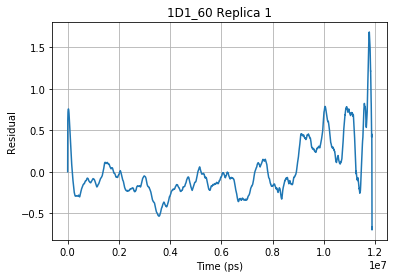

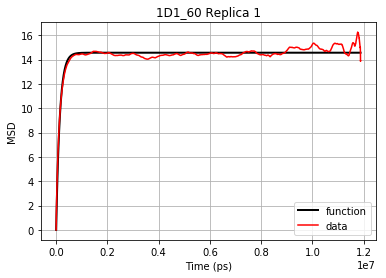

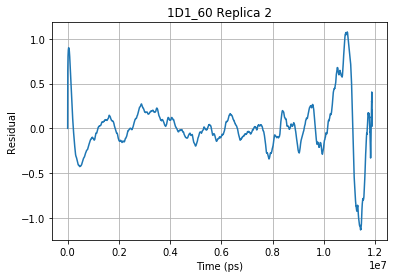

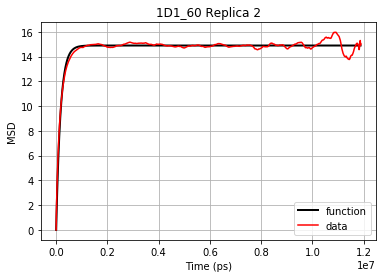

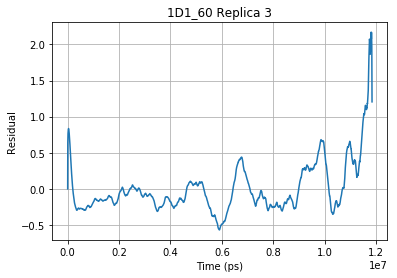

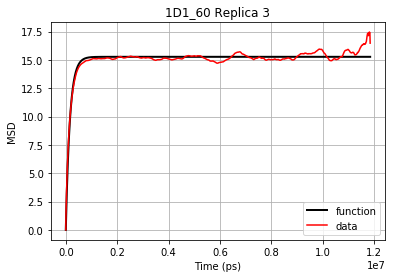

1D1_65


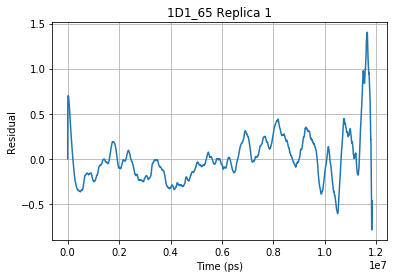

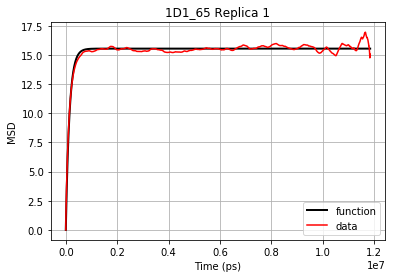

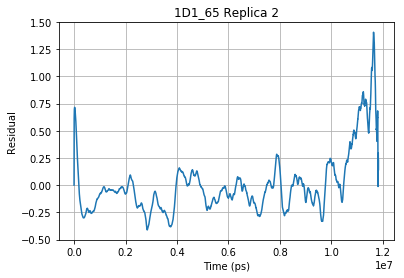

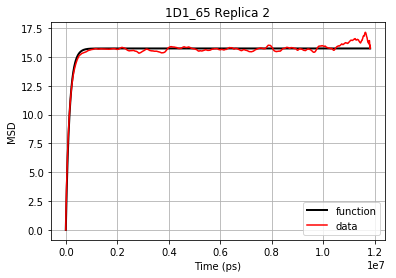

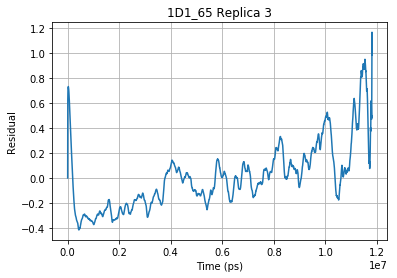

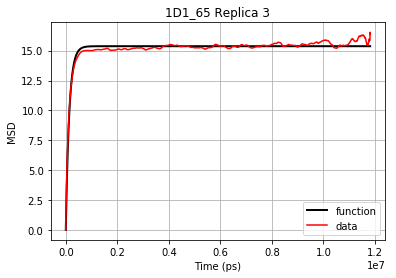

1D1_70


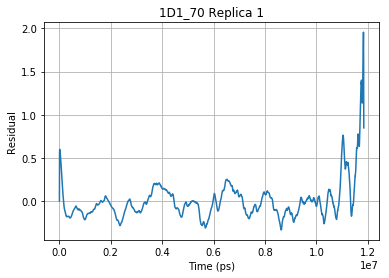

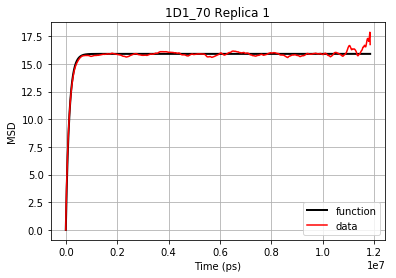

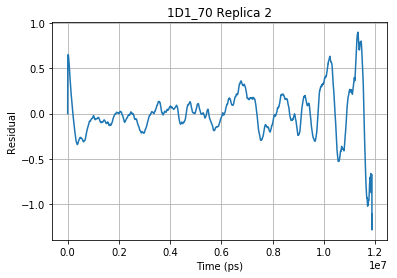

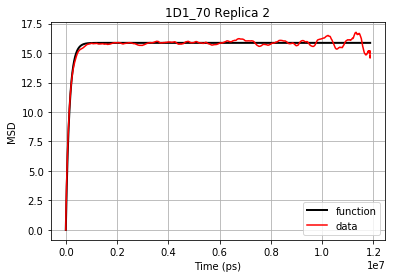

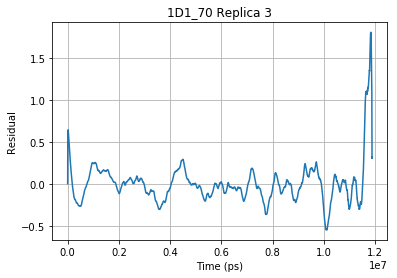

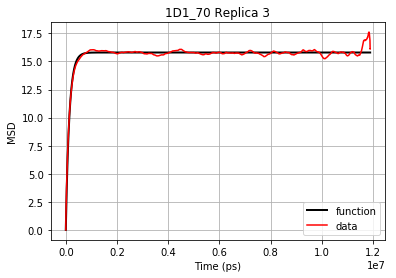

1D1_75


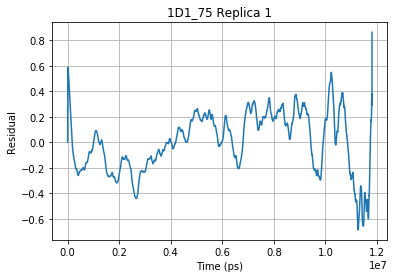

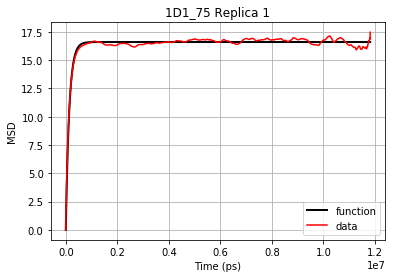

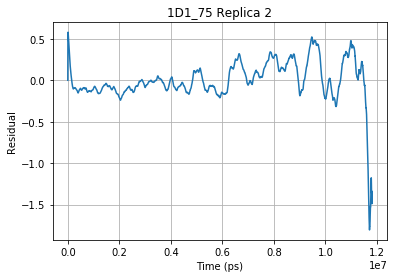

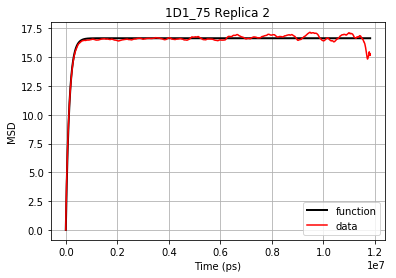

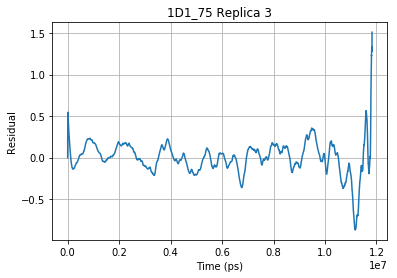

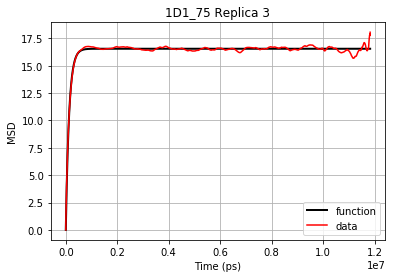

1D1_80


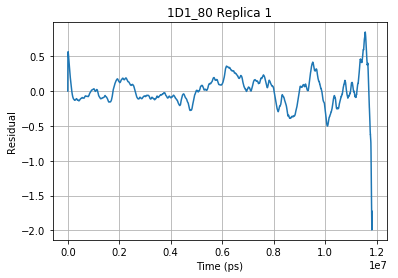

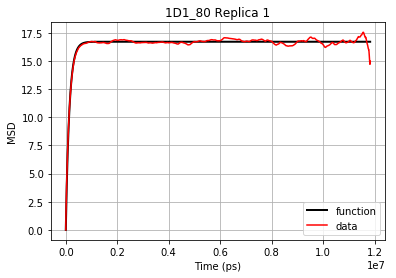

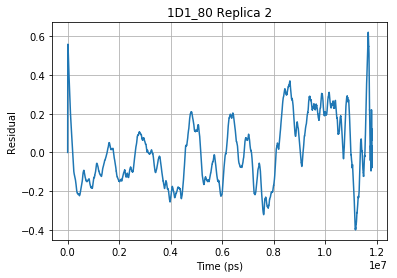

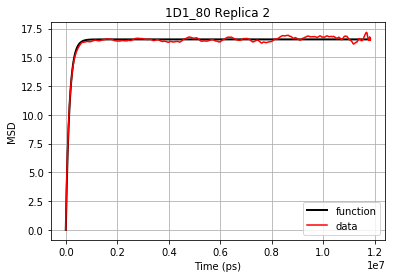

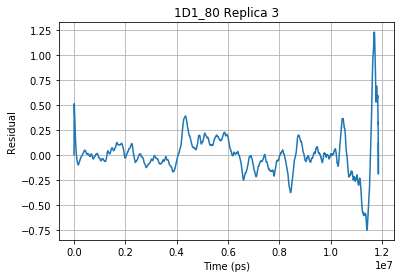

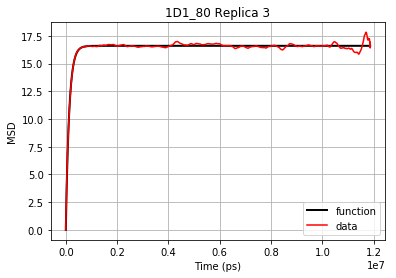

1D1_85


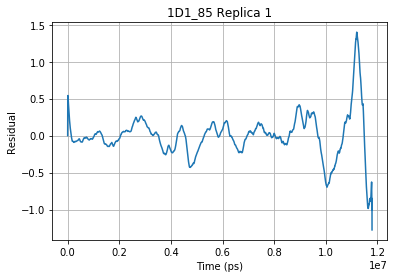

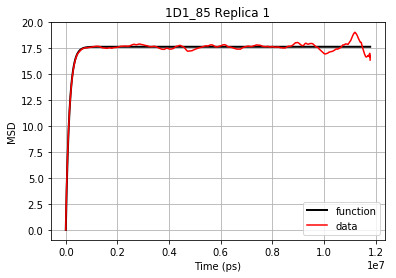

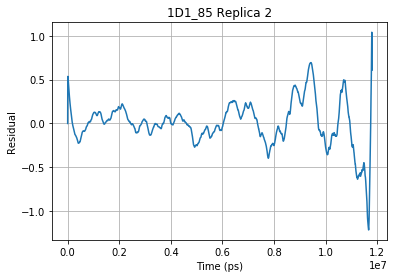

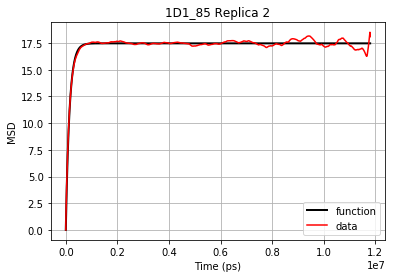

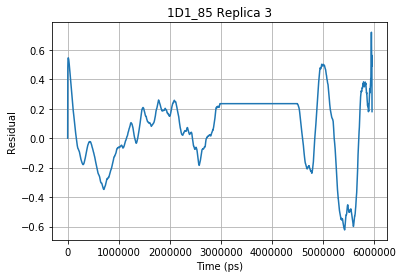

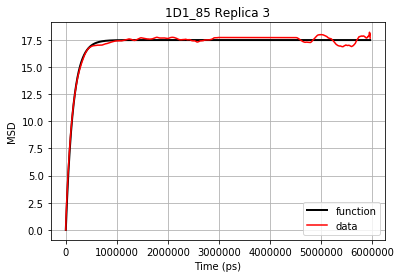

1D1_90


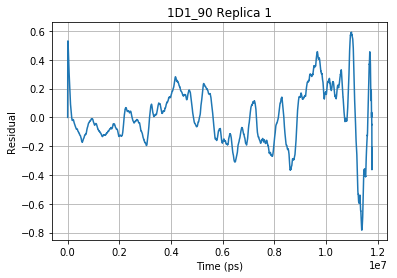

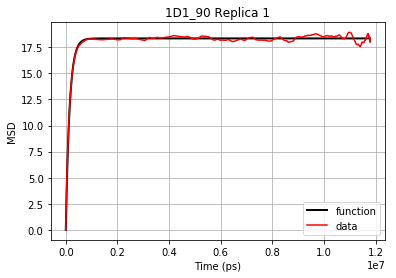

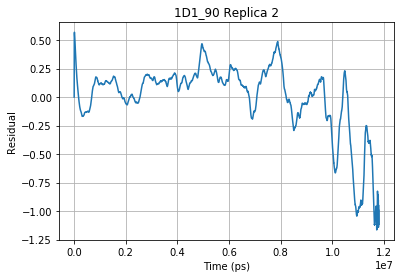

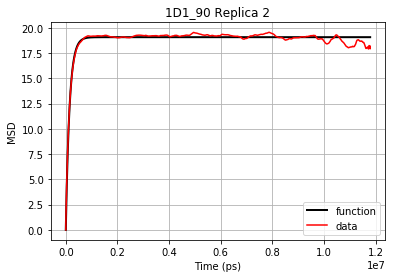

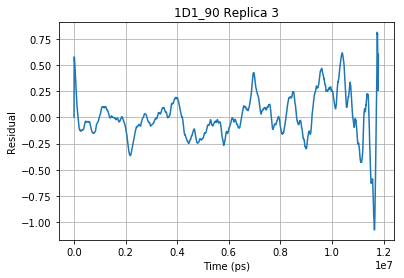

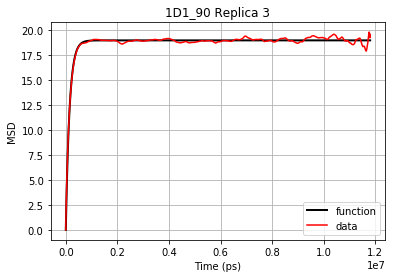

In [39]:
systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90']
#systems = ['NW11_70', 'NW11_80', 'NW11_90','NW11_99', 'NW11_110']
Radius_list = [4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]
#file_out = open('Diffusion_coefficient_radius_ALL.dat', 'w')
#file_mean = open('Diffusion_coefficient_means.dat', 'w')
file_out = open('Diffusion_coefficient_radius_1D1.dat', 'w')
file_mean = open('Diffusion_coefficient_means_1D1.dat', 'w')
M = []
S = [] 
for idx, s in enumerate(systems): 
    name = s
    print (name)
    #print (idx)
    R = Radius_list[idx]
    #rep = '1'
    local_array = np.zeros([3])
    for r in range(1,4):
        rep='{0:d}'.format(r)
        d = np.loadtxt('{0:s}_v{1:s}_nowat_whole_msd.xvg'.format(name, rep), comments=('#','@'))
        popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 4.85 ])
        Diffusion_coeff, Radius = popt.ravel()
        plot_residual(d, func, popt, name, rep)
        plot_data_func(d, func, popt, name, rep)
        file_out.write('{0:s} replica {1:s}\n'.format(name, rep))
        file_out.write('Diffusion Coeffcient in nm²/ µs\n')
        file_out.write('{0:.5f}\n'.format(Diffusion_coeff * 10**6))
        file_out.write('Radius in nm of the bilayer patch\n')
        file_out.write('{0:.5f}\n'.format(Radius))
        file_out.write('\n')
        file_out.flush()
        
        local_array[r-1] = Diffusion_coeff * 10**6
    mean_coeff = np.average(local_array)
    std_coeff  = np.std(local_array)
    M.append(mean_coeff)
    S.append(std_coeff)
    #print (mean_coeff)
    file_mean.write('{0:s}\n'.format(name))
    file_mean.write('Mean Diffusion Coefficient in  nm²/ µs\n')
    file_mean.write('{0:f}\n'.format(mean_coeff))
    file_mean.write('Std\n')
    file_mean.write('{0:f}\n'.format(np.std(local_array)))
    file_mean.write('\n')
    file_mean.flush()

file_out.close()
file_mean.close()

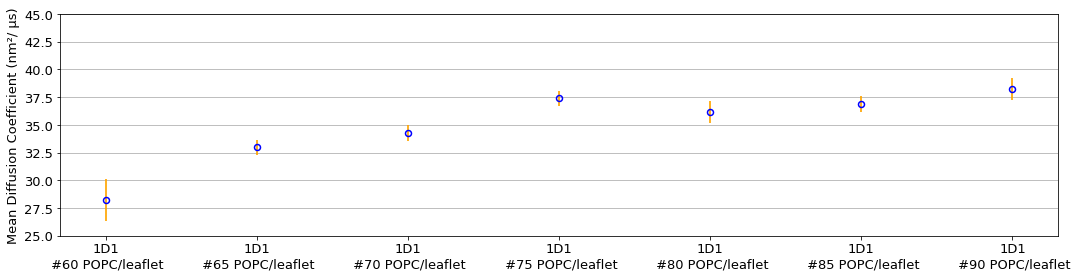

In [40]:
labels = ['1D1\n #60 POPC/leaflet', '1D1\n #65 POPC/leaflet','1D1\n #70 POPC/leaflet','1D1\n #75 POPC/leaflet','1D1\n #80 POPC/leaflet', '1D1\n #85 POPC/leaflet', '1D1\n #90 POPC/leaflet']
plt.figure(figsize=(15,4))
plt.errorbar(range(len(systems)), M, yerr=S, fmt='o', fillstyle='none', ecolor='orange',markeredgewidth=1.5,  mec='blue', linewidth=1.7)
plt.xticks(range(len(systems)), labels, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, axis='y')
plt.ylabel('Mean Diffusion Coefficient (nm²/ µs)', fontsize=13)
plt.tight_layout()
plt.ylim(25,45)
plt.savefig('Mean_diffusion_coefficient_1D1.png', dpi=600)

NW11_70


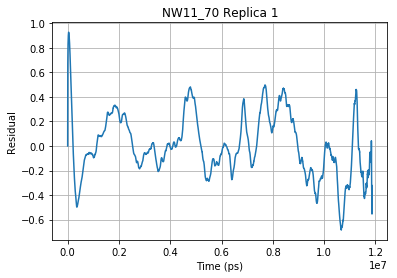

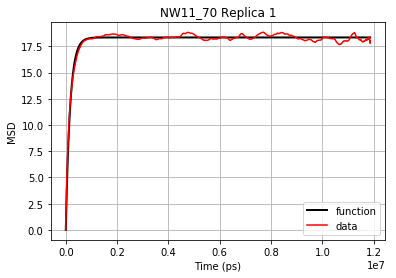

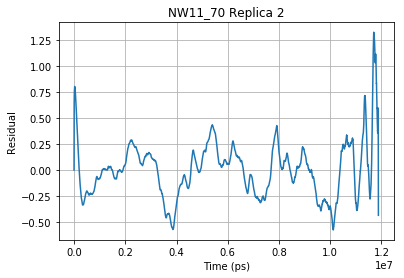

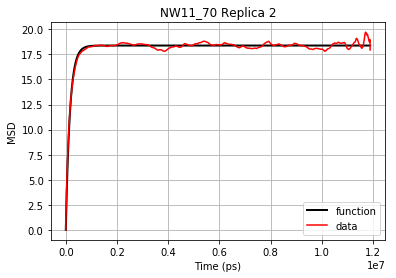

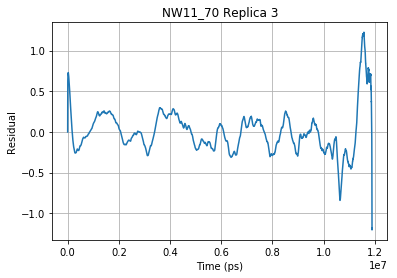

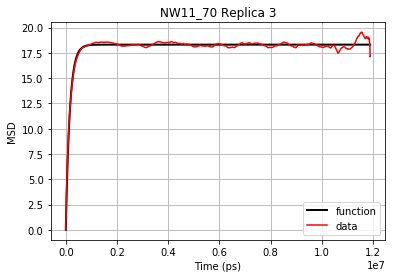

NW11_80


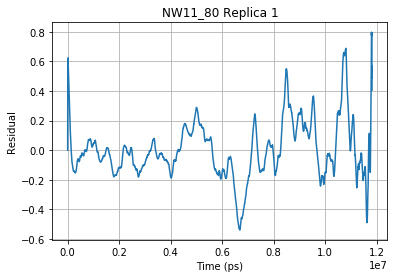

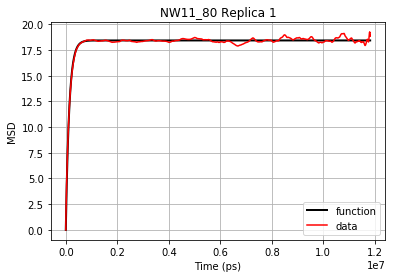

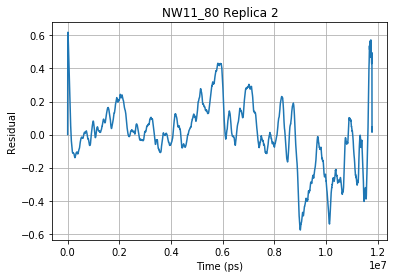

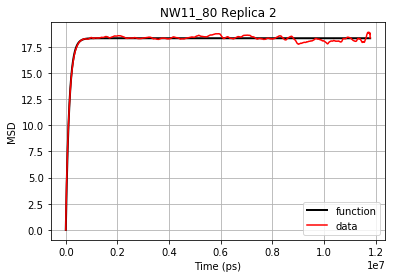

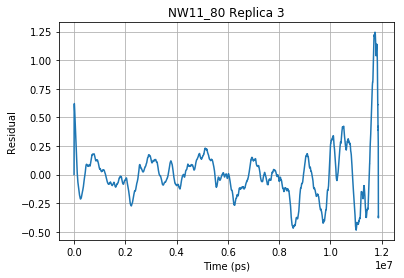

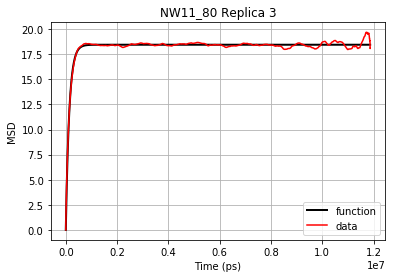

NW11_90


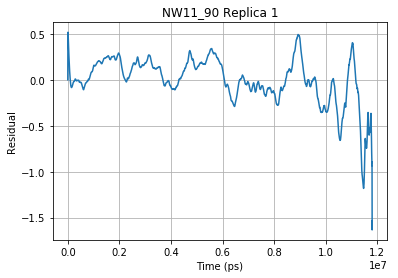

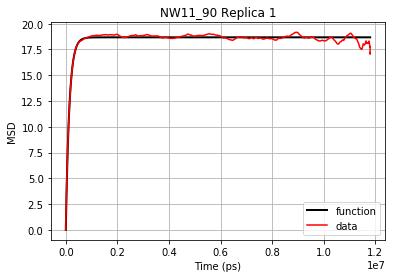

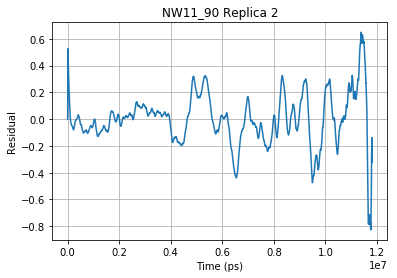

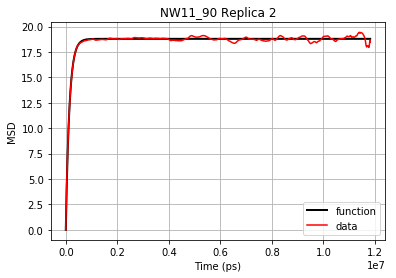

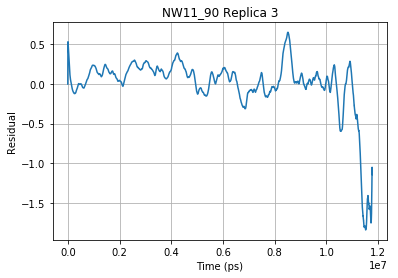

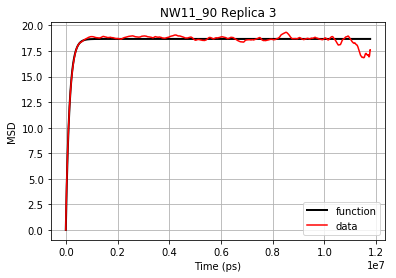

NW11_99


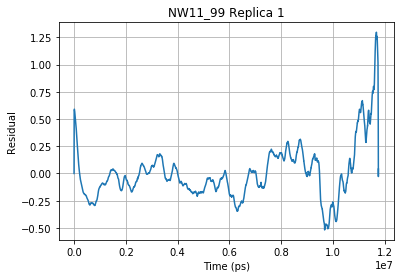

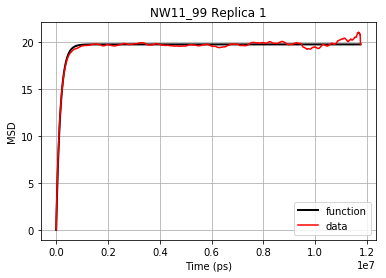

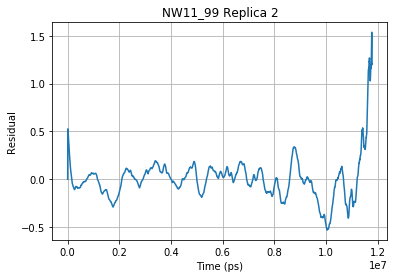

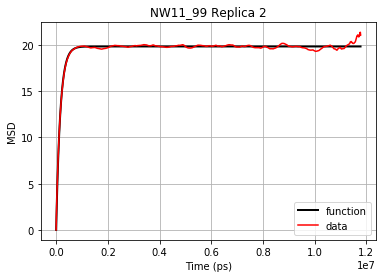

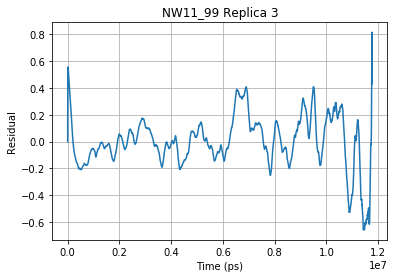

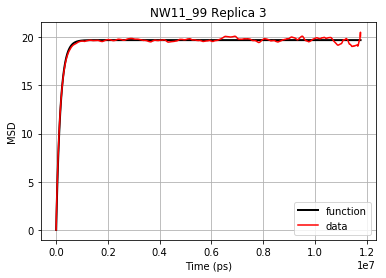

NW11_110


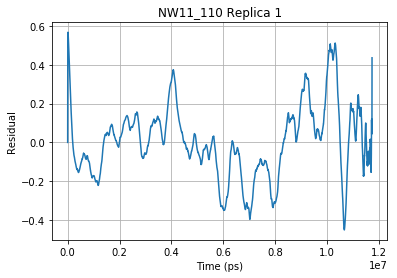

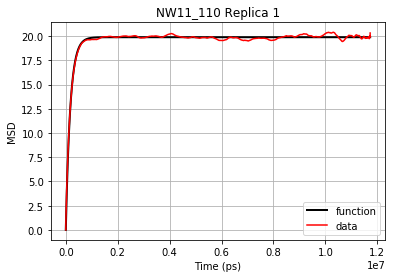

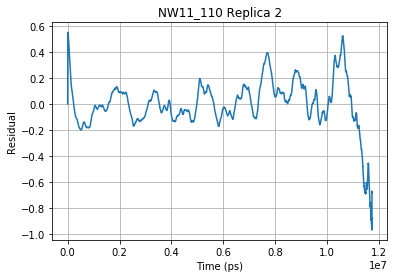

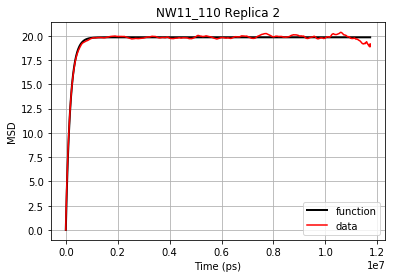

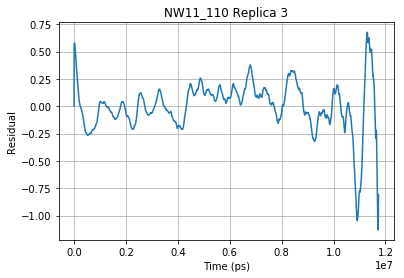

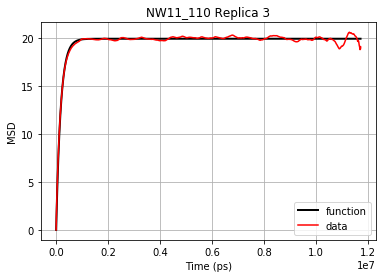

In [41]:
#systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90']
systems = ['NW11_70', 'NW11_80', 'NW11_90','NW11_99', 'NW11_110']
Radius_list = [4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]
#file_out = open('Diffusion_coefficient_radius_ALL.dat', 'w')
#file_mean = open('Diffusion_coefficient_means.dat', 'w')
file_out = open('Diffusion_coefficient_radius_NW11.dat', 'w')
file_mean = open('Diffusion_coefficient_means_NW11.dat', 'w')
M = []
S = [] 
for idx, s in enumerate(systems): 
    name = s
    print (name)
    #print (idx)
    R = Radius_list[idx]
    #rep = '1'
    local_array = np.zeros([3])
    for r in range(1,4):
        rep='{0:d}'.format(r)
        d = np.loadtxt('{0:s}_v{1:s}_nowat_whole_msd.xvg'.format(name, rep), comments=('#','@'))
        popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 4.85 ])
        Diffusion_coeff, Radius = popt.ravel()
        plot_residual(d, func, popt, name, rep)
        plot_data_func(d, func, popt, name, rep)
        file_out.write('{0:s} replica {1:s}\n'.format(name, rep))
        file_out.write('Diffusion Coeffcient in nm²/ µs\n')
        file_out.write('{0:.5f}\n'.format(Diffusion_coeff * 10**6))
        file_out.write('Radius in nm of the bilayer patch\n')
        file_out.write('{0:.5f}\n'.format(Radius))
        file_out.write('\n')
        file_out.flush()
        
        local_array[r-1] = Diffusion_coeff * 10**6
    mean_coeff = np.average(local_array)
    std_coeff  = np.std(local_array)
    M.append(mean_coeff)
    S.append(std_coeff)
    #print (mean_coeff)
    file_mean.write('{0:s}\n'.format(name))
    file_mean.write('Mean Diffusion Coefficient in  nm²/ µs\n')
    file_mean.write('{0:f}\n'.format(mean_coeff))
    file_mean.write('Std\n')
    file_mean.write('{0:f}\n'.format(np.std(local_array)))
    file_mean.write('\n')
    file_mean.flush()

file_out.close()
file_mean.close()

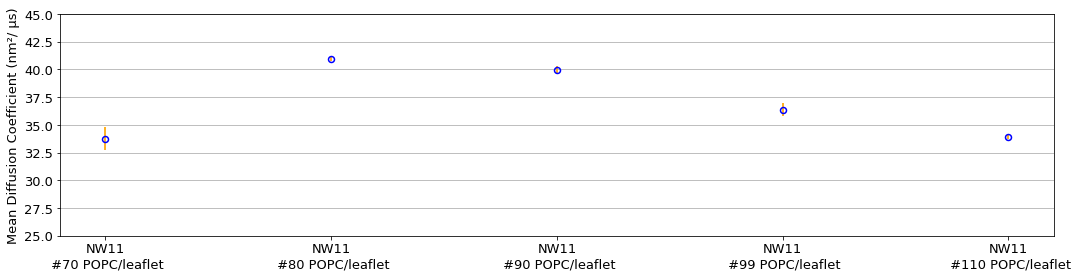

In [42]:
labels = ['NW11\n #70 POPC/leaflet', 'NW11\n #80 POPC/leaflet', 'NW11\n #90 POPC/leaflet', 'NW11\n #99 POPC/leaflet', 'NW11\n #110 POPC/leaflet']
plt.figure(figsize=(15,4))
plt.errorbar(range(len(systems)), M, yerr=S, fmt='o', fillstyle='none', ecolor='orange',markeredgewidth=1.5,  mec='blue', linewidth=1.7)
plt.xticks(range(len(systems)), labels, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, axis='y')
plt.ylabel('Mean Diffusion Coefficient (nm²/ µs)', fontsize=13)
plt.tight_layout()
plt.ylim(25,45)
plt.savefig('Mean_diffusion_coefficient_NW11.png', dpi=600)